In [24]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


# LOAD DATASET

In [3]:
img_height = 224
img_width = 224
data_directory = "./dataset"
batch_size = 32
train= tf.keras.utils.image_dataset_from_directory(
   data_directory,
   validation_split=0.3,
   subset="training",
   seed=42, 
   image_size=(img_height, img_width),
   batch_size=batch_size,
   labels="inferred",
   label_mode="categorical",
   color_mode="rgb")
test= tf.keras.utils.image_dataset_from_directory(
   data_directory,
   validation_split=0.3,
   subset="validation",
   seed=42, 
   image_size=(img_height, img_width),
   batch_size=batch_size,
   labels="inferred",
   label_mode="categorical",
   color_mode="rgb")


Found 993 files belonging to 9 classes.
Using 696 files for training.
Found 993 files belonging to 9 classes.
Using 297 files for validation.


LOAD MODEL

In [4]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet")
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 4,007,548
Non-trainable params: 42,023
__________________________________________________________________________________________________


In [5]:
image_batch, label_batch = next(iter(train))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


# MODEL

In [6]:
base_model.trainable = False

In [7]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [9]:
prediction_layer = tf.keras.layers.Dense(9)
activation_pred = tf.keras.layers.Softmax()
prediction_batch = prediction_layer(feature_batch_average)
prediction_batch = activation_pred(prediction_batch)
print(prediction_batch.shape)

(32, 9)


In [10]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = prediction_layer(x)
outputs = activation_pred(x)
model = tf.keras.Model(inputs, outputs)

# COMPILE MODEL & TRAIN

In [11]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 9)                 11529     
                                                                 
 softmax (Softmax)           (None, 9)                 0         
                                                             

In [13]:
initial_epochs = 100

loss0, accuracy0 = model.evaluate(test)

10/10 [==============================] - 3s 83ms/step - loss: 2.2807 - accuracy: 0.1414


In [14]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.28
initial accuracy: 0.14


In [15]:
earlystopping = EarlyStopping(
    monitor = 'val_accuracy', 
    verbose = 1, 
    patience = 5
)

# save the best model with lower loss
Best = ModelCheckpoint(
    filepath = "weights.hdf5", 
    verbose = 1, 
    save_best_only = True
    #include_optimizer=False
)

In [16]:
history = model.fit(train,
                    epochs=initial_epochs,
                    validation_data=test,
                   callbacks =[earlystopping])

Epoch 1/100
22/22 [==============================] - 8s 133ms/step - loss: 2.2594 - accuracy: 0.1307 - val_loss: 2.1502 - val_accuracy: 0.1852
Epoch 2/100
22/22 [==============================] - 3s 134ms/step - loss: 2.1269 - accuracy: 0.1911 - val_loss: 2.0325 - val_accuracy: 0.2357
Epoch 3/100
22/22 [==============================] - 3s 133ms/step - loss: 1.9758 - accuracy: 0.2902 - val_loss: 1.9241 - val_accuracy: 0.3165
Epoch 4/100
22/22 [==============================] - 3s 132ms/step - loss: 1.8743 - accuracy: 0.3664 - val_loss: 1.8236 - val_accuracy: 0.4276
Epoch 5/100
22/22 [==============================] - 3s 133ms/step - loss: 1.7645 - accuracy: 0.4598 - val_loss: 1.7292 - val_accuracy: 0.5185
Epoch 6/100
22/22 [==============================] - 3s 133ms/step - loss: 1.6633 - accuracy: 0.5230 - val_loss: 1.6419 - val_accuracy: 0.5926
Epoch 7/100
22/22 [==============================] - 3s 133ms/step - loss: 1.5747 - accuracy: 0.5920 - val_loss: 1.5612 - val_accuracy: 0.6296

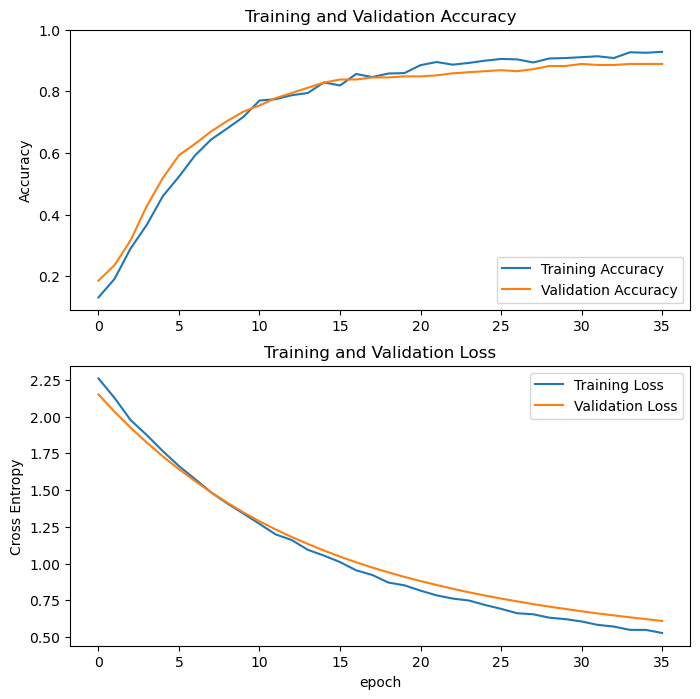

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# FINE TUNING

In [27]:
base_model.trainable = True

In [28]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  238


In [29]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [30]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 9)                 11529     
                                                                 
 softmax (Softmax)           (None, 9)                 0         
                                                             

In [31]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test)


Epoch 36/105
22/22 [==============================] - 16s 303ms/step - loss: 0.6789 - accuracy: 0.9282 - val_loss: 0.6781 - val_accuracy: 0.8990
Epoch 37/105
22/22 [==============================] - 5s 230ms/step - loss: 0.6725 - accuracy: 0.9339 - val_loss: 0.6737 - val_accuracy: 0.9091
Epoch 38/105
22/22 [==============================] - 5s 231ms/step - loss: 0.6688 - accuracy: 0.9397 - val_loss: 0.6710 - val_accuracy: 0.9091
Epoch 39/105
22/22 [==============================] - 5s 231ms/step - loss: 0.6655 - accuracy: 0.9425 - val_loss: 0.6687 - val_accuracy: 0.9091
Epoch 40/105
22/22 [==============================] - 5s 234ms/step - loss: 0.6634 - accuracy: 0.9555 - val_loss: 0.6672 - val_accuracy: 0.9057
Epoch 41/105
22/22 [==============================] - 5s 234ms/step - loss: 0.6619 - accuracy: 0.9598 - val_loss: 0.6659 - val_accuracy: 0.9125
Epoch 42/105
22/22 [==============================] - 5s 235ms/step - loss: 0.6601 - accuracy: 0.9641 - val_loss: 0.6649 - val_accuracy

Epoch 93/105
22/22 [==============================] - 6s 246ms/step - loss: 0.6513 - accuracy: 0.9971 - val_loss: 0.6578 - val_accuracy: 0.9360
Epoch 94/105
22/22 [==============================] - 6s 255ms/step - loss: 0.6513 - accuracy: 0.9971 - val_loss: 0.6579 - val_accuracy: 0.9394
Epoch 95/105
22/22 [==============================] - 6s 245ms/step - loss: 0.6513 - accuracy: 0.9971 - val_loss: 0.6577 - val_accuracy: 0.9360
Epoch 96/105
22/22 [==============================] - 6s 246ms/step - loss: 0.6513 - accuracy: 0.9971 - val_loss: 0.6577 - val_accuracy: 0.9495
Epoch 97/105
22/22 [==============================] - 6s 249ms/step - loss: 0.6513 - accuracy: 0.9971 - val_loss: 0.6578 - val_accuracy: 0.9428
Epoch 98/105
22/22 [==============================] - 6s 243ms/step - loss: 0.6513 - accuracy: 0.9971 - val_loss: 0.6577 - val_accuracy: 0.9461
Epoch 99/105
22/22 [==============================] - 6s 244ms/step - loss: 0.6512 - accuracy: 0.9971 - val_loss: 0.6581 - val_accuracy:

In [32]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

TypeError: unsupported operand type(s) for +=: 'float' and 'list'

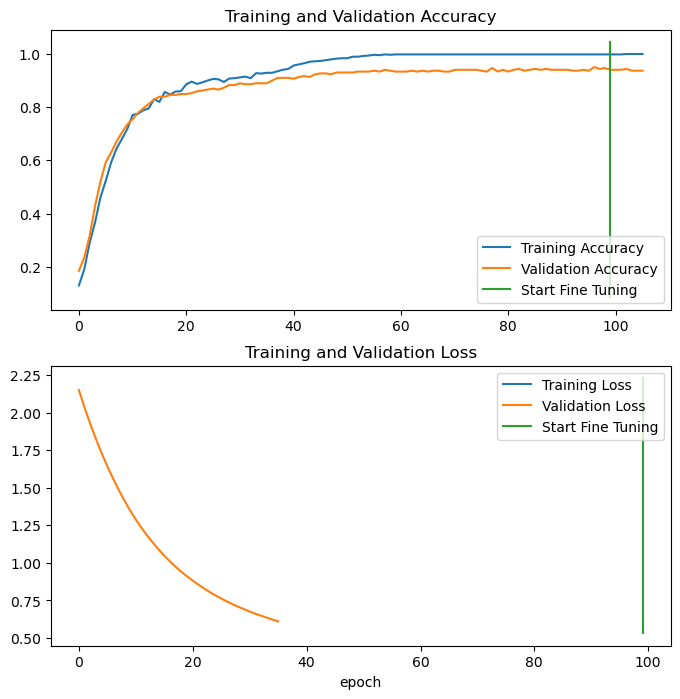

In [33]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
# plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
# plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


# EVALUATION

In [34]:
loss, accuracy = model.evaluate(test)
print('Test accuracy :', accuracy)

10/10 [==============================] - 1s 78ms/step - loss: 0.6577 - accuracy: 0.9360
Test accuracy : 0.936026930809021


Predictions:
 [3 4 0 2 8 4 5 5 6 8 3 5 0 7 7 5 7 2 8 0 0 3 1 4 1 6 6 4 1 5 8 8]
Labels:
 [[0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 

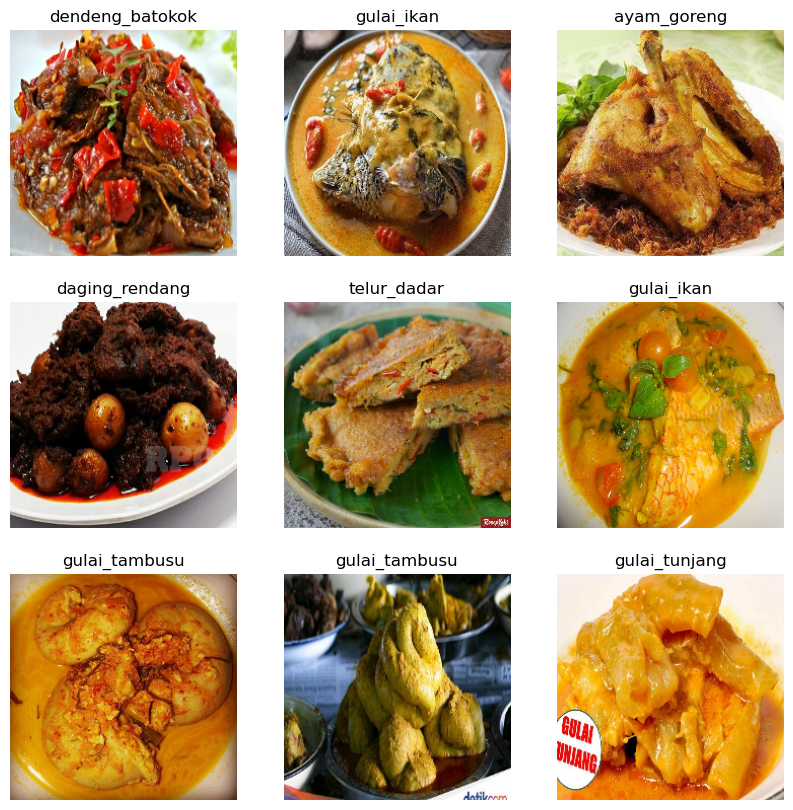

In [35]:
# Retrieve a batch of images from the test set
class_names = train.class_names
image_batch, label_batch = test.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.argmax(predictions, axis=1)


print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")


In [37]:
model.save("./savedModel1.h5")

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.